# Distribution of the distances between $n$ random points
Given $n$ idd random points sampled from a uniform distribution on interval $[0,1]$, we consider the $n-1$ pairwise distance between consecutive points (considering their order on the segment). We empirically find the distribution of this distance.

## 1. Analytical solution for $n=2$

The distribution of the distance between two random points sampled independently and uniformly on $[0, 1]$ is:

$$ 
p(x) = 2(1-x) \quad x \in [0,1]
$$
Demonstration is given below:

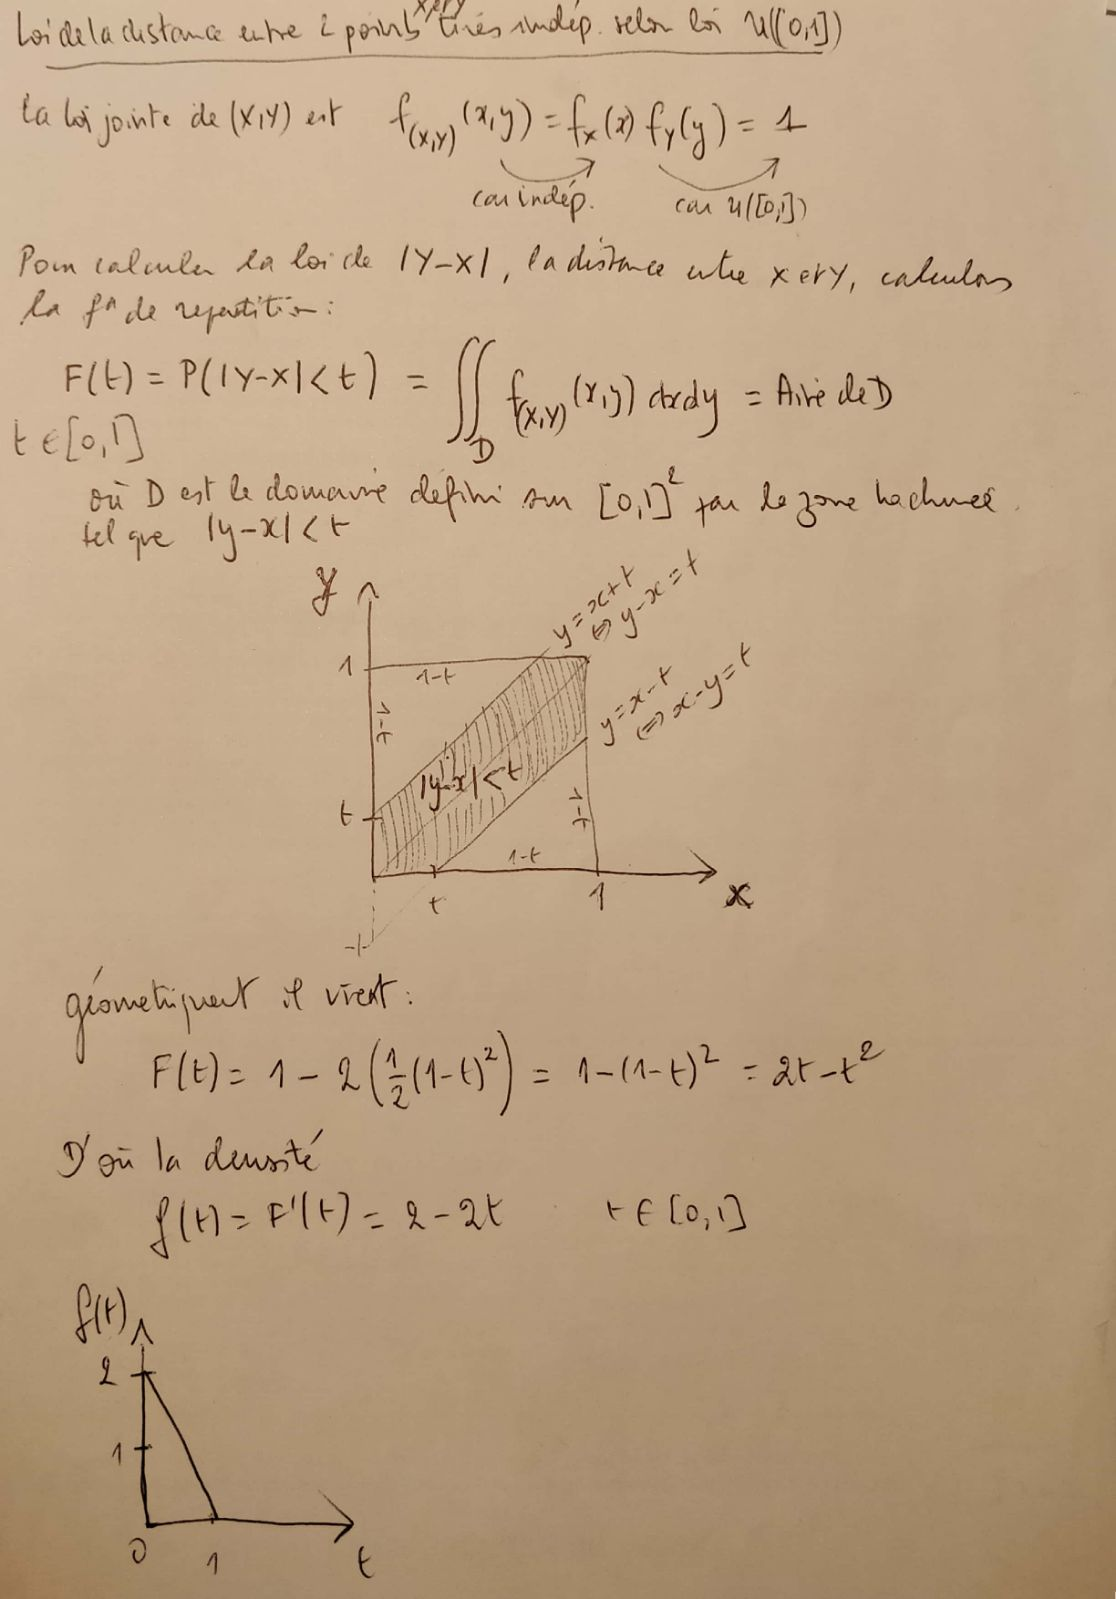

In [11]:
from IPython.display import Image
Image("../discrepancy_repo/img/densite_distance_entre_points_n2.jpg", width=400)

## 2. empirical solution for $n \geq 2$
We sample for a given n and we check it fits on density:

$$ 
p(x) = n(1-x)^{n-1} \quad x \in [0,1]
$$



In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
n = 100000
sample = np.sort(np.random.sample(n))

In [41]:
# empirical sample
empir_dists = sample[1:] - sample[:-1]
print("empirical mean =", empir_dists.mean())
print("theoretical mean=", 1./(n+1))

empirical mean = 1.00000177977e-05
theoretical mean= 9.99990000099999e-06


In [42]:
# candidate theoretical sample
def theor_density(x, n):
    return n * np.power(1 - x, n - 1)

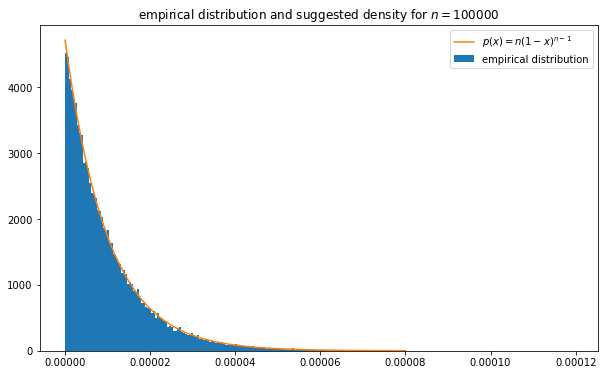

In [43]:
fig = plt.figure(figsize=(10, 6))

# plot empirical histogram
(n2, bins, patches) = plt.hist(empir_dists, bins='auto', label='empirical distribution')
bin_width = bins[1] - bins[0]
hist_surf = np.sum(n2 * bin_width)

# plot density
xs = np.linspace(0, 8./n, 10000)
density = hist_surf * theor_density(xs, n)
plt.plot(xs, density, label=r'$p(x) = n(1-x)^{n-1}$')

plt.legend()
plt.title("empirical distribution and suggested density for $n = {}$".format(n))
plt.show()